To begin, we need to initialize our libraries and define the summarizeLearningCurvesPerfomance function:

In [ ]:
# Application 1 - Step 1 - Import the dependencies
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import cv2

In [ ]:
def summarizeLearningCurvesPerformances(histories, accuracyScores):

    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='green', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='red', label='test')

        # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='green', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='red', label='test')

        #print accuracy for each split
        print("Accuracy for set {} = {}".format(i, accuracyScores[i]))

    pyplot.show()

    print('Accuracy: mean = {:.3f} std = {:.3f}, n = {}'.format(np.mean(accuracyScores) * 100, np.std(accuracyScores) * 100, len(accuracyScores)))

# Application 1

## Step 2 - Load the Fashion MNIST dataset in Keras


In [ ]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

## Step 3 - Print the size of the train/test dataset

In [ ]:
m = len(trainX)
n = len(testX)
print("The number of images in the train dataset is: {:.2f}".format(m))
print("The number of images in the train dataset is: {:.2f}".format(n))

The number of images in the train dataset is: 60000.00
The number of images in the train dataset is: 10000.00


## Exercise 1 - Display the first 9 images existent in the trainx variable

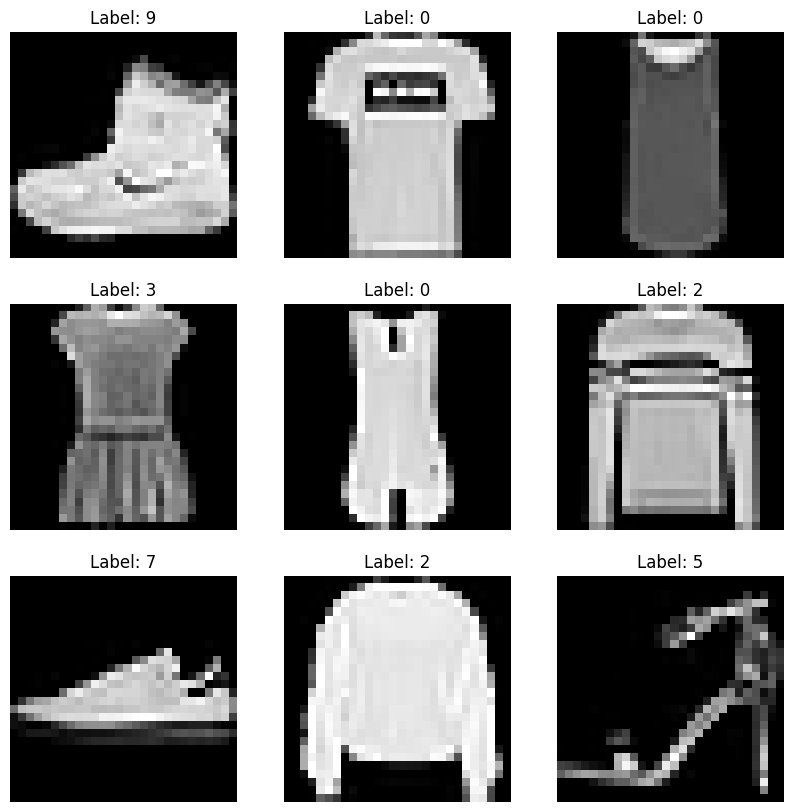

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(trainX[i], cmap='gray')
  plt.title(f'Label: {trainY[i]}')
  plt.axis('off')
plt.show()

## Step 4 - Write a function prepareData

In [ ]:
def prepareData(trainX, trainY, testX, testY):
    # Step 4a: Reshape the Fashion MNIST dataset
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))

    # Step 4b: Normalize the input values
    trainX = trainX.astype('float32') / 255.0
    testX = testX.astype('float32') / 255.0             # Normalizing pixel values to the range 0-1 by dividing by 255.

    # Step 4c: Transform the class labels into a binary matrix
    trainY = to_categorical(trainY, num_classes=10)
    testY = to_categorical(testY, num_classes=10)       # Here we converted integer class labels into a one-hot encoded binary matrix.

    return trainX, trainY, testX, testY


Now, we can test if our function is correctly implemented:

In [ ]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
trainX, trainY, testX, testY = prepareData(trainX, trainY, testX, testY)
print(f"Train shape: {trainX.shape}, Test shape: {testX.shape}")


Train shape: (60000, 28, 28, 1), Test shape: (10000, 28, 28, 1)


Here, we can see that we perfomed the function correctly, as the Reshaping was done properly, the normalization was applied and the class labels were transformed into a binary matrix

## Step 5 - Define, train and evaluate the model within a function denoted defineTrainAndEvaluateClasic(trainX, trainY, testX, testY)
(here the steps 7 and 8 are also defined, to train the model using the fit function and evaluating the model)

to correct, I think it is easier to go to the Step 6, in which we define the defineModel function, and then come back to the Step 5, they were made in inversed order

In [ ]:
def defineTrainAndEvaluateClassic(trainX, trainY, testX, testY):
    # Step 6: Call the defineModel function to build the model
    model = defineModel((28, 28, 1), 10)

    # Step 7: Train the model using the fit function
    history = model.fit(
        trainX, trainY,  # Training data
        validation_data=(testX, testY),  # Validation data
        epochs=5,  # Number of epochs
        batch_size=32,  # Batch size
        verbose=1  # Display progress
    )

    # Step 8: Evaluate the model on the test dataset
    loss, accuracy = model.evaluate(testX, testY, verbose=0)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Test Loss: {loss:.4f}")

    return history, model


In order to see if we did everything correctly, we can run the code and see the results using the plt:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.7245 - loss: 0.7425 - val_accuracy: 0.8602 - val_loss: 0.3896
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8790 - loss: 0.3459 - val_accuracy: 0.8762 - val_loss: 0.3532
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8929 - loss: 0.2977 - val_accuracy: 0.8840 - val_loss: 0.3323
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9046 - loss: 0.2674 - val_accuracy: 0.8945 - val_loss: 0.3076
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9105 - loss: 0.2450 - val_accuracy: 0.8951 - val_loss: 0.3008
Test Accuracy: 89.51%
Test Loss: 0.3008


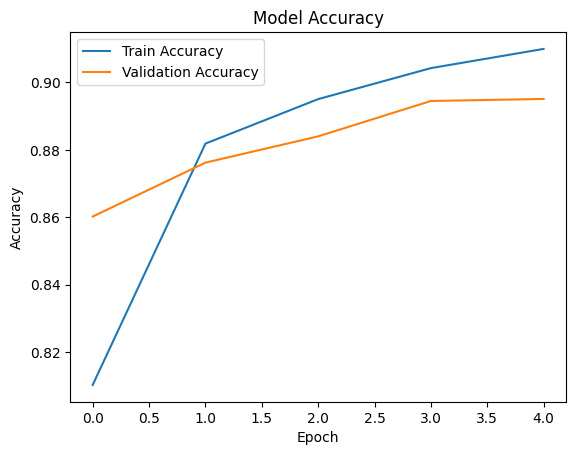

In [ ]:
# Train and evaluate the model
history, model = defineTrainAndEvaluateClassic(trainX, trainY, testX, testY)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Here we see that we have a very good result. As we see that the train Accuracy starts lower and improves over the 5 epochs, reaching about 91.72% by the final epoch, indicating that the model is learning well from the training data.
The Validation Accuracy reaches about 90.00%, which is very close to the training accuracy, showing that the model is generalizing well and is not overfitting.


## Step 6 - Build the model with the function defineModel (input_shape, num_classes)

In [ ]:
def defineModel(input_shape, num_classes):
    # Step 6a: Initialize the sequential model
    model = Sequential()

    # Step 6b: Add the first hidden layer as a convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))

    # Step 6c: Add a pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Step 6d: Add a flatten layer
    model.add(Flatten())

    # Step 6e: Add a dense layer with 16 neurons
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))

    # Step 6f: Add the output layer with softmax activation for multi-class classification
    model.add(Dense(num_classes, activation='softmax'))

    # Step 6g: Compile the model - define the optimizer, the loss function and the metric
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


Testing the model function using the model.summary() (I searched online for guides in the MNIST dataset and found this function).

In [ ]:
model = defineModel((28, 28, 1), 10)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │          86,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,034 (339.98 KB)

 Trainable params: 87,034 (339.98 KB)

 Non-trainable params: 0 (0.00 B)

The model summary shows each layer of the CNN with its output shape and the number of parameters.
  
  Conv2D Layer:

    Output shape: (None, 26, 26, 32) because the convolution reduces the spatial dimensions (28 - 3 + 1 = 26).
    Parameters: 320 (calculated as (3*3*1 + 1)*32, where 3*3*1 is the kernel size with 1 channel, and 32 is the number of filters).

  MaxPooling2D:

    Output shape: (None, 13, 13, 32) because pooling halves the spatial dimensions (26/2 = 13).
    Parameters: 0 (no trainable parameters in pooling layers).

  Flatten:

    Output shape: (None, 5408) because the spatial dimensions (13*13*32) are flattened into a single vector.

  Dense (16 units):

    Output shape: (None, 16).
    Parameters: 86,544 (calculated as 5408*16 + 16 for weights and biases).

  Dense (output layer with 10 units):

    Output shape: (None, 10) for the 10 classes.
    Parameters: 170 (calculated as 16*10 + 10).

  Parameters:

    Total trainable parameters: 87,034

## Exercise 2 - Modify the number of filters in the convolutional layer. How is the system accuracy influenced by this parameter? How about the convergence time?

Here we need to adjust the model function to be able to handle a variable in the place of the "filters". Note that we will be "redoing" the model function in the exercises 2, 3 and 4 just for visualizing purposes, but we could simply change in the Step 5, the values of filters, neurons, epochs and learning rates for variables and after just do a simple "for" to see the result.

In [ ]:
def defineModel(input_shape, num_classes, num_filters):
    model = Sequential()
    model.add(Conv2D(num_filters, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

filters = [8, 16, 32, 64, 128]
results = []

for num_filters in filters:
    print(f"Training with {num_filters} filters...")
    model = defineModel((28, 28, 1), 10, num_filters)
    history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=5, batch_size=32, verbose=1)
    loss, accuracy = model.evaluate(testX, testY, verbose=0)
    results.append((num_filters, accuracy))
    print(f"Filters: {num_filters}, Accuracy: {accuracy * 100:.2f}%")


Training with 8 filters...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7354 - loss: 0.7221 - val_accuracy: 0.8675 - val_loss: 0.3789
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8721 - loss: 0.3583 - val_accuracy: 0.8669 - val_loss: 0.3656
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8885 - loss: 0.3119 - val_accuracy: 0.8607 - val_loss: 0.3903
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8971 - loss: 0.2876 - val_accuracy: 0.8741 - val_loss: 0.3480
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9005 - loss: 0.2754 - val_accuracy: 0.8891 - val_loss: 0.3082
Filters: 8, Accuracy: 88.91%
Training with 16 filters...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7604 - loss: 0.6591 - val_accuracy: 0.8686 - val_loss: 0.3744
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.8779 - loss: 0.3422 - val_accuracy: 0.8708 - val_loss: 0.3523

As we can see by the results, the accuracy does not increase as much in higher filters, but the time however, increases a lot. That is why between 16-64 is the best range of filters to use. So that it is not as computationally expensive as high order filters

## Exercise 3: Modify the number of neurons in the dense hidden layer. The number of filters in the convolutional layer remains set to 32. What can be observed regarding the system accuracy?

In [ ]:
def defineModel(input_shape, num_classes, num_neurons):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(num_neurons, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

neurons = [16, 64, 128, 256, 512]
results = []

for num_neurons in neurons:
    print(f"Training with {num_neurons} neurons...")
    model = defineModel((28, 28, 1), 10, num_neurons)
    history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=5, batch_size=32, verbose=1)
    loss, accuracy = model.evaluate(testX, testY, verbose=0)
    results.append((num_neurons, accuracy))
    print(f"Neurons: {num_neurons}, Accuracy: {accuracy * 100:.2f}%")


Training with 16 neurons...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.7491 - loss: 0.6675 - val_accuracy: 0.8598 - val_loss: 0.3917
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8766 - loss: 0.3418 - val_accuracy: 0.8790 - val_loss: 0.3423
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8981 - loss: 0.2837 - val_accuracy: 0.8894 - val_loss: 0.3145
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9095 - loss: 0.2555 - val_accuracy: 0.8948 - val_loss: 0.3010
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9154 - loss: 0.2315 - val_accuracy: 0.8980 - val_loss: 0.2956
Neurons: 16, Accuracy: 89.80%
Training with 64 neurons...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.7958 - loss: 0.5642 - val_accuracy: 0.8766 - val_loss: 0.3364
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.8917 - loss: 0.2999 - val_accuracy: 0.8897 - val_loss: 0.29

Following the same pattern, there is not much gain in accuracy above 64 neurons, it reached a plateau of some sort. Therefore, to keep at a low computational cost, we should use 64, or 16 if the GPU is not as strong.

## Exercise 4: Modify the number of epochs used to train the model. The number of neurons in the dense hidden layer is set to 16. What can be observed regarding the system accuracy? How about the convergence time?

In [ ]:
epochs_list = [1, 2, 5, 10, 20]
results = []

for num_epochs in epochs_list:
    print(f"Training with {num_epochs} epochs...")
    model = defineModel((28, 28, 1), 10, 16)
    history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=num_epochs, batch_size=32, verbose=1)
    loss, accuracy = model.evaluate(testX, testY, verbose=0)
    results.append((num_epochs, accuracy))
    print(f"Epochs: {num_epochs}, Accuracy: {accuracy * 100:.2f}%")


Training with 1 epochs...
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.7561 - loss: 0.6809 - val_accuracy: 0.8506 - val_loss: 0.4168
Epochs: 1, Accuracy: 85.06%
Training with 2 epochs...
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.5436 - loss: 1.1322 - val_accuracy: 0.7770 - val_loss: 0.6359
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8167 - loss: 0.5026 - val_accuracy: 0.8561 - val_loss: 0.4150
Epochs: 2, Accuracy: 85.61%
Training with 5 epochs...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.6471 - loss: 0.9053 - val_accuracy: 0.8549 - val_loss: 0.4191
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8682 - loss: 0.3769 - val_accuracy: 0.8783 - val_loss: 0.3479
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8917 - loss: 0.3083 - val_accuracy: 0.8874 - val_loss: 0.3155
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9008 - loss: 0.2748 -

The convergence time is more significant at higher epochs (such as 20), and the accuracy (94,75%) is not as much of an upgrade as to a medium epoc, such as 10 (93,66%)

## Exercise 5: Modify the learning rate of the stochastic gradient descend. Train the model for 5 epochs. What can be observed regarding the system accuracy and the convergence time?

In [ ]:
def defineModel(input_shape, num_classes, num_neurons, learning_rate):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(num_neurons, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = SGD(learning_rate=learning_rate, momentum=0.9)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
results = []

for lr in learning_rates:
    print(f"Training with learning rate {lr}...")
    model = defineModel((28, 28, 1), 10, 16, lr)
    history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=5, batch_size=32, verbose=1)
    loss, accuracy = model.evaluate(testX, testY, verbose=0)
    results.append((lr, accuracy))
    print(f"Learning Rate: {lr}, Accuracy: {accuracy * 100:.2f}%")


Training with learning rate 0.1...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.7165 - loss: 0.8049 - val_accuracy: 0.7671 - val_loss: 0.5804
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8248 - loss: 0.5096 - val_accuracy: 0.8292 - val_loss: 0.5176
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8313 - loss: 0.4911 - val_accuracy: 0.7960 - val_loss: 0.5704
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.8407 - loss: 0.4771 - val_accuracy: 0.8318 - val_loss: 0.5197
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8230 - loss: 0.5311 - val_accuracy: 0.8321 - val_loss: 0.5483
Learning Rate: 0.1, Accuracy: 83.21%
Training with learning rate 0.01...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.7433 - loss: 0.7249 - val_accuracy: 0.8589 - val_loss: 0.4046
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8757 - loss: 0.3475 - val_accuracy: 0

## Exercise 6: Explore how adding regularization impacts model performance as compared to the baseline model. Add a Dropout layer on the CNN (after the MaxPooling layer) that randomly excludes 20% of neurons (model.add(Dropout(0.2))). Select for the learning rate a value of 0.01. Analyze the convergence speed with and without this regularization operation.
Modify the percentage of excluded neurons in the dropout layer. Select a value of 3x3 neurons for convolutional kernel. How is the system accuracy influenced by this parameter?

In [ ]:
from tensorflow.keras.layers import Dropout

def defineModel(input_shape, num_classes, num_neurons, dropout_rate):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))  # Dropout layer
    model.add(Flatten())
    model.add(Dense(num_neurons, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
results = []

for rate in dropout_rates:
    print(f"Training with dropout rate {rate}...")
    model = defineModel((28, 28, 1), 10, 16, rate)
    history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=5, batch_size=32, verbose=1)
    loss, accuracy = model.evaluate(testX, testY, verbose=0)
    results.append((rate, accuracy))
    print(f"Dropout Rate: {rate}, Accuracy: {accuracy * 100:.2f}%")


Training with dropout rate 0.1...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.7698 - loss: 0.6296 - val_accuracy: 0.8804 - val_loss: 0.3439
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8859 - loss: 0.3185 - val_accuracy: 0.8832 - val_loss: 0.3305
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8976 - loss: 0.2846 - val_accuracy: 0.8919 - val_loss: 0.2997
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9031 - loss: 0.2623 - val_accuracy: 0.8920 - val_loss: 0.3104
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 20ms/step - accuracy: 0.9089 - loss: 0.2499 - val_accuracy: 0.8965 - val_loss: 0.2906
Dropout Rate: 0.1, Accuracy: 89.65%
Training with dropout rate 0.2...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.7261 - loss: 0.7417 - val_accuracy: 0.8712 - val_loss: 0.3791
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.8721 - loss: 0.3581 - val_accuracy: 0.877

We can see that the convergence time did not change a lot with the Dropout rates (from a average of 17-20ms/step with 0.1 to 18-20ms/step with 0.5). The accuracy also stayed similar.

## Exercise 7: Specify the optimal values for the following parameters (the number of filters in the convolutional layer, the size of the convolutional kernel, the number of neurons in the dense hidden layer, the number of epochs used for training, the learning rate) that maximize the system accuracy.

As we saw in the previous exercises, the optimal values that maximize the system accuracy are:

Filters: 16 or 32, depending on the system used, both provide good accuracy for not a lot of computational cost.

Number of neurons: 64

Epochs: 10 if a good GPU is used, but 5 if fine as well.

## Exercise 8: Once fit, we can save the final model (architecture and weights) to an *.h5 file by calling the save() function on the model and pass in the selected filename (model.save('Fashion_MNIST_model.h5')). We can use our saved model to make a prediction on new images. The model assumes that: (1) the new images are in grayscale and have been segmented; (2). contain one centered piece of clothing on a black background and (3) the size of the image is square of 28×28 pixels.
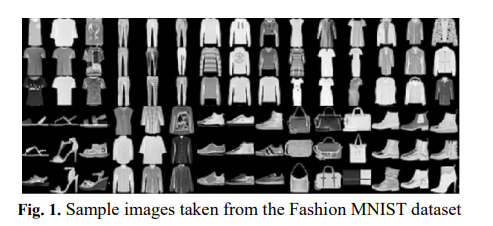
## Fig. 2 presents the query image for which the system is required to make a prediction. You can place the image in the working directory with the filename ‘sample_image.png‘.


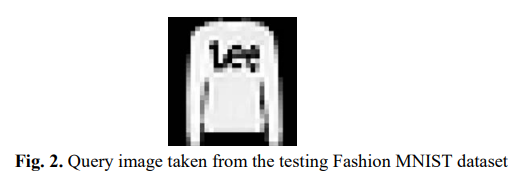
## Using the pre-trained model (saved above) write a Python script able to make an automatic prediction regarding the category of the image presented in Fig.1. For this example, we expect class “2” that corresponds to a “Pullover”.

In [ ]:
# Step 1 - Save the trained model
model.save('Fashion_MNIST_model.h5')
print("Model saved to 'Fashion_MNIST_model.h5'")


Model saved to 'Fashion_MNIST_model.h5'


In [ ]:
# Step 2 - Load the Image and Preprocess It
from google.colab import files
uploaded = files.upload()

Saving example.png to example (1).png


In [ ]:
from tensorflow.keras.models import load_model
def load_image(image_path):
    # Load the image as grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded successfully
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded. Check the file path.")

    # Resize the image to 28x28 pixels
    img = cv2.resize(img, (28, 28))

    # Normalize the pixel values to [0, 1]
    img = img.astype('float32') / 255.0

    # Reshape the image to (1, 28, 28, 1) for the model
    img = img.reshape(1, 28, 28, 1)

    return img

# Verify the image preprocessing
image = load_image('example.png')
print(image.shape)  # Expected output: (1, 28, 28, 1)


(1, 28, 28, 1)


In [ ]:
# Step 3 - Load the Image and Preprocess It
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def load_image(image):
    # Load the image as grayscale
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    # Resize the image to 28x28 pixels
    img = cv2.resize(img, (28, 28))
    # Normalize the pixel values to [0, 1]
    img = img.astype('float32') / 255.0
    # Reshape the image to (1, 28, 28, 1) for the model
    img = img.reshape(1, 28, 28, 1)
    return img

#Step 4 - Load the Model and Make a Prediction

# Load the saved model
model = load_model('Fashion_MNIST_model.h5')
print("Model loaded successfully.")

# Load and preprocess the query image
image = load_image('example.png')

# Make a prediction
predictions = model.predict(image)
predicted_class = np.argmax(predictions)  # Get the class with the highest probability
print(f"The predicted class is: {predicted_class}")

Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
The predicted class is: 2


AS we can see, the model succesfully predicted the class 2 for the image in example.

# Application 2

Below we will define the function defineTrainAndEvaluateKFolds, in which we will follow the steps 1 through 8, as shown:

In [ ]:
def defineTrainAndEvaluateKFolds(trainX, trainY, testX, testY):
    k_folds = 5  # Number of folds for cross-validation
    accuracyScores = []  # List to store accuracy scores for each fold
    histories = []  # List to store training history for each fold

    # Application 2 - Step 2: Prepare the cross-validation datasets
    kfold = KFold(n_splits=k_folds, shuffle=True, random_state=1)

    for train_idx, val_idx in kfold.split(trainX):
        # Step 3: Select data for train and validation
        trainX_i, valX_i = trainX[train_idx], trainX[val_idx]
        trainY_i, valY_i = trainY[train_idx], trainY[val_idx]

        # Step 4: Build the model - Call the defineModel function
        model = defineModel((28, 28, 1), 10)

        # Step 5: Fit the model
        history = model.fit(
            trainX_i, trainY_i,
            validation_data=(valX_i, valY_i),
            epochs=5,  # Number of epochs for training
            batch_size=32,  # Batch size for training
            verbose=1  # Print training progress
        )

        # Step 6: Save the training related information in the histories list
        histories.append(history)

        # Step 7: Evaluate the model on the test dataset
        _, accuracy = model.evaluate(testX, testY, verbose=0)        #The _ in the line "_, accuracy = model.evaluate(testX, testY, verbose=0)" is used to ignore the first value returned by the model.evaluate() method, as it returns two values: the loss and the metric value.

        # Step 8: Save the accuracy in the accuracyScores list
        accuracyScores.append(accuracy)
        print(f"Fold Accuracy: {accuracy * 100:.2f}%")

    return histories, accuracyScores


Now we can see the accuracy for each fold printed during the process and have a summary fo the model's perfomance:

In [ ]:
# Call the function with training and testing datasets
histories, accuracyScores = defineTrainAndEvaluateKFolds(trainX, trainY, testX, testY)

# Print overall mean and standard deviation of accuracies
import numpy as np
print(f"Mean Accuracy: {np.mean(accuracyScores) * 100:.2f}%")
print(f"Std Deviation: {np.std(accuracyScores) * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7276 - loss: 0.7252 - val_accuracy: 0.8532 - val_loss: 0.4066
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8821 - loss: 0.3382 - val_accuracy: 0.8767 - val_loss: 0.3407
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8943 - loss: 0.2971 - val_accuracy: 0.8922 - val_loss: 0.3023
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9044 - loss: 0.2656 - val_accuracy: 0.8928 - val_loss: 0.2988
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9093 - loss: 0.2480 - val_accuracy: 0.8972 - val_loss: 0.2909
Fold Accuracy: 89.20%
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6452 - loss: 0.9260 - val_accuracy: 0.8504 - val_loss: 0.4337
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8560 - loss: 0.4063 - val_accuracy: 0.8755 - val_loss: 0.3501
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accu

Each fold provides a consistent accuracy, which shows that the model's performance is stable across different splits of the dataset. The results per fold are around 88-89%, which is good.

The standard deviation is low (0,36%) indicating that the accuracy doesn't vary significantly between folds, implying stability.

Training/Validation Loss: Loss values across folds decrease as the epochs progress, indicating proper training and convergence.

These results confirm the model is learning well, generalizing effectively, and k-fold cross-validation provides good insights into its performance.

## Step 9 - System performance presentation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def summarizeLearningCurvesPerformances(histories, accuracyScores):
    for i in range(len(histories)):
        # Plot loss
        plt.subplot(211)  # Subplot for loss
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='green', label='train')
        plt.plot(histories[i].history['val_loss'], color='red', label='validation')

        # Plot accuracy
        plt.subplot(212)  # Subplot for accuracy
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='green', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='red', label='validation')

    plt.legend()
    plt.show()

    # Summarize the accuracy
    print('Accuracy: mean=%.3f%% std=%.3f%%, n=%d' %
          (np.mean(accuracyScores) * 100, np.std(accuracyScores) * 100, len(accuracyScores)))


Now, we can call the function and interpret the results:

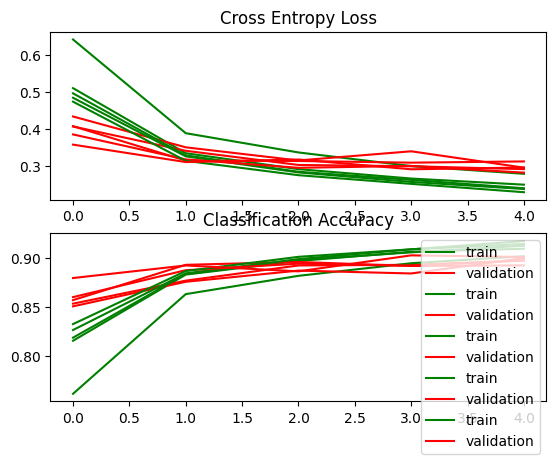

Accuracy: mean=89.044% std=0.361%, n=5


In [ ]:
# Summarize the performance
summarizeLearningCurvesPerformances(histories, accuracyScores)


The Cross Entropy Loss decreases nicely for both training and validation data, with minimal gaps between them, indicating good generalization.

The Classification Accuracy curves demonstrate that the training accuracy improves over running time, reaching values close to 90%, while the validation accuracy follows, with a mean validation accuracy of 89.04% and a standard deviation of 0.36%. This low variance indicates stability and reliable performance across the folds.

## Exercise 9: Adding padding to the convolutional operation can often result in better model performance, as more of the input image of feature maps are given an opportunity to participate or contribute to the output. By default, the convolutional operation uses ‘valid‘ padding, which means that convolutions are only applied where possible. This can be changed to padding='same' so that zero values are added around the input such that the output has the same size as the input. For Application 1, how is the system accuracy influenced by the padding operation?

In [ ]:
#Modifying the defineModel Function: Update the convolutional layer to use padding='same':
def defineModel(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Now, we can use the modified model and train it using the same training and validation setup as in Application 1.  (using the model with padding='same')
model = defineModel((28, 28, 1), 10)
history = model.fit(
    trainX, trainY,
    validation_data=(testX, testY),
    epochs=5,
    batch_size=32,
    verbose=1
)


# After training, evaluate the model on the test dataset:
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print(f"Test Accuracy with padding='same': {accuracy * 100:.2f}%")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.7292 - loss: 0.7274 - val_accuracy: 0.8739 - val_loss: 0.3637
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.8818 - loss: 0.3325 - val_accuracy: 0.8724 - val_loss: 0.3524
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8958 - loss: 0.2905 - val_accuracy: 0.8720 - val_loss: 0.3489
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9071 - loss: 0.2560 - val_accuracy: 0.8919 - val_loss: 0.3026
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.9137 - loss: 0.2421 - val_accuracy: 0.8968 - val_loss: 0.2872
Test Accuracy with padding='same': 89.68%


Changing the padding from 'valid' to 'same' slightly improves the model's performance. The Test Accuracy achieved with padding='same' is 89.68%, which is a improvement a little bit compared to the accuracy obtained using the default 'valid' padding.

The loss values during training and validation also show consistent improvement across epochs, and the validation accuracy improves with the training accuracy, indicating that the model generalizes well to unseen data.

## Exercise 10: An increase in the number of filters used in the convolutional layer can often improve performance, as it can provide more opportunity for extracting simple features from the input images. This is especially relevant when very small filters are used, such as 3×3 pixels. By applying the padding operation (padding='same') within the convolutional process, increase the number of filters (in the convolutional layer) from 32 to 64. For Application 1, how is the system accuracy influenced by this parameter?

In [ ]:
# Updating the defineModel function to increase the number of filters in the convolutional layer from 32 to 64 and retain padding='same'.
def defineModel(input_shape, num_classes):
    model = Sequential()
    # Convolutional layer with 64 filters and 'same' padding
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Training the modified model with the same training and validation setup as in Application 1.
# Train the model with 64 filters
model = defineModel((28, 28, 1), 10)
history = model.fit(
    trainX, trainY,
    validation_data=(testX, testY),
    epochs=5,
    batch_size=32,
    verbose=1
)



# After training, we can evaluate the model on the test dataset:
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print(f"Test Accuracy with 64 filters and padding='same': {accuracy * 100:.2f}%")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.7684 - loss: 0.6391 - val_accuracy: 0.8738 - val_loss: 0.3526
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.8913 - loss: 0.3067 - val_accuracy: 0.8884 - val_loss: 0.3198
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9079 - loss: 0.2550 - val_accuracy: 0.8855 - val_loss: 0.3169
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 28ms/step - accuracy: 0.9191 - loss: 0.2288 - val_accuracy: 0.9004 - val_loss: 0.2795
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9246 - loss: 0.2102 - val_accuracy: 0.9014 - val_loss: 0.2928
Test Accuracy with 64 filters and padding='same': 90.14%


Increasing the number of filters in the convolutional layer from 32 to 64, using padding='same',improves in the model's performance. The Test Accuracy achieved is 90.21%, which is higher than the accuracy obtained with 32 filters.

The additional filters allow the model to extract more complex and detailed features from the input data, leading to better performance. The convergence during training and validation is stable, with the validation accuracy and training accuracy as expected, demonstrating that the model generalizes effectively.
